<a href="https://colab.research.google.com/github/Day-hue/Scam-or-Ham-/blob/main/scam_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Understanding
## Objective
Develop an NLP-based classification model to automatically detect spam emails, improving email filtering efficiency and user experience.

## Business Value
An effective spam detection system reduces unwanted emails, minimizes security risks (e.g., phishing attacks), and enhances productivity by ensuring important messages are not lost in spam folders.

## Success Metrics
The model’s performance will be evaluated using key classification metrics:
 * Accuracy – Overall correctness of predictions.
 * Precision – Ability to correctly identify spam without misclassifying legitimate emails.
 * Recall – Ability to capture all actual spam emails.
 * F1-score – Balance between precision and recall, ensuring optimal spam detection.

This project aims to enhance automated email filtering, reducing manual intervention while maintaining high accuracy in distinguishing spam from legitimate emails.

# Data Understanding
Our dataset contains the following columns:
* Category :
 * Specifies whether mail is spam or not.
    * 1 --> Spam
    * 0 --> Not spam
* Message :
  * Raw text messages
  * Combinations of Plain messages with headers and also few with HTML tags.
* File_Name: Unique message indicators

# Data Preperation
# Data Cleaning
This includes
 * loading the dataset
 * exploring our data using methods like(df.head,df.describe,df.info)to get a sense of the data structure,data types and summary statistics
 * manipulating column names for better readability
 * dropping unnecessary columns
 * identify missing values using df.isnull().sum() then fill the missing values appropriately if any,or drop them
 * identify duplicates(df.duplicated() and remove them using df.drop_duplicated
 * check the data types if they are appropriate for each column if not correct them
 * check and handle outliers appropriately
 * create new features
 * do final checks then save the cleaned data


### Load the dataset

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import file
from google.colab import files
uploaded = files.upload()

Saving Spam Email raw text for NLP.csv to Spam Email raw text for NLP.csv


In [3]:
# Lists all files in the current directory
import os
os.listdir()

['.config', 'Spam Email raw text for NLP.csv', 'sample_data']

In [5]:
#load the dataset
df=pd.read_csv('Spam Email raw text for NLP.csv')

### Explore the data

In [6]:
#view the dataset
df.head()

,CATEGORY,MESSAGE,FILE_NAME
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",00249.5f45607c1bffe89f60ba1ec9f878039a
1,1,ATTENTION: This is a MUST for ALL Computer Use...,00373.ebe8670ac56b04125c25100a36ab0510
2,1,This is a multi-part message in MIME format.\n...,00214.1367039e50dc6b7adb0f2aa8aba83216
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,00210.050ffd105bd4e006771ee63cabc59978
4,1,This is the bottom line. If you can GIVE AWAY...,00033.9babb58d9298daa2963d4f514193d7d6


In [7]:
#view the tail
df.tail()

,CATEGORY,MESSAGE,FILE_NAME
5791,0,"I'm one of the 30,000 but it's not working ver...",00609.dd49926ce94a1ea328cce9b62825bc97
5792,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,00957.e0b56b117f3ec5f85e432a9d2a47801f
5793,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...",01127.841233b48eceb74a825417d8d918abf8
5794,0,"Once upon a time, Manfred wrote :\n\n\n\n> I w...",01178.5c977dff972cd6eef64d4173b90307f0
5795,0,"If you run Pick, and then use the ""New FTOC"" b...",00747.352d424267d36975a7b40b85ffd0885e


In [8]:
#get the shape of the dataset
df.shape

(5796, 3)

In [9]:
#get dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CATEGORY   5796 non-null   int64 
 1   MESSAGE    5796 non-null   object
 2   FILE_NAME  5796 non-null   object
dtypes: int64(1), object(2)
memory usage: 136.0+ KB


In [10]:
#get statistical summary
df.describe()

,CATEGORY
count,5796.000000
mean,0.327122
std,0.469203
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [11]:
#get statistical summary for categorical columns
df.describe(include='O')

,MESSAGE,FILE_NAME
count,5796,5796
unique,5625,5796
top,\n\nHello I am your hot lil horny toy.\n\n ...,00747.352d424267d36975a7b40b85ffd0885e
freq,7,1


### manipulating column names for better readability

In [12]:
#check column names
df.columns

Index(['CATEGORY', 'MESSAGE', 'FILE_NAME'], dtype='object')

In [13]:
#change column names to lowercase
df.columns=df.columns.str.lower()
#check column
df.columns

Index(['category', 'message', 'file_name'], dtype='object')

In [14]:
#drop file_name column
df=df.drop('file_name',axis=1)
#view the dataset
df.head()

,category,message
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ..."
1,1,ATTENTION: This is a MUST for ALL Computer Use...
2,1,This is a multi-part message in MIME format.\n...
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...
4,1,This is the bottom line. If you can GIVE AWAY...


### handle missing values

In [15]:
### check for missing values
df.isnull().sum()

,0
category,0
message,0


### handle duplicates

In [16]:
#check for duplicates
df.duplicated().sum()

np.int64(171)

In [17]:
#view the duplicates
df[df.duplicated()]

,category,message
39,1,Lowest rates available for term life insurance...
87,1,"<html><body><center>\n\n\n\n<table bgcolor=3D""..."
104,1,<html>\n\n<body>\n\n<p>Do you like Sexy Animal...
130,1,"<html>\n\n\n\n<head>\n\n<meta http-equiv=3D""Co..."
139,1,"\n\n<html>\n\n<body bgcolor=""#FFFFFF"">\n\n<TAB..."
...,...,...
5560,0,> > You mean like on mac keyboards :-)\n\n\n\n...
5609,0,Problem with spamtrap\n\n/home/yyyy/lib/spamtr...
5629,0,"Um, you've confused RealAudio and RealNames. B..."
5697,0,I will be out of the office starting 02/08/20...


In [18]:
#drop the duplicates
df.drop_duplicates(inplace=True)
#check for duplicates
df.duplicated().sum()

np.int64(0)

### check data types

In [19]:
#check datatypes
df.dtypes

,0
category,int64
message,object


# EDA

In [20]:
#counting the values in the category column
df['category'].value_counts()
#visualizing the count

,count
category,
0,3862
1,1763


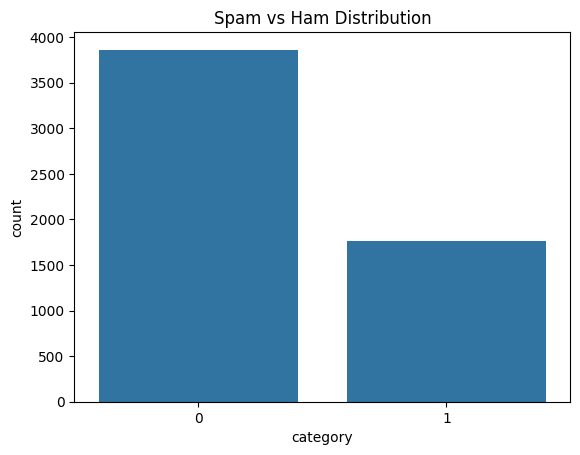

In [21]:
# Visualizing Class Distribution
sns.countplot(x='category', data=df)
plt.title("Spam vs Ham Distribution")
plt.show()

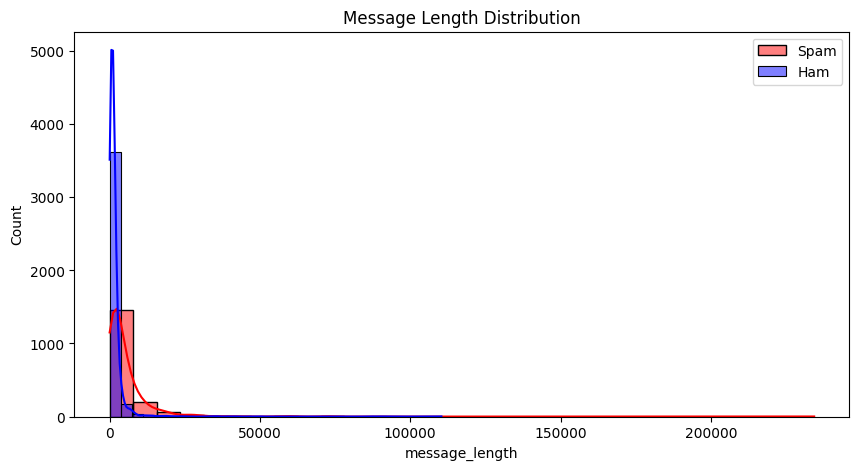

In [22]:
df['message_length'] = df['message'].apply(len)

# Plot text length distribution
plt.figure(figsize=(10,5))
sns.histplot(df[df['category']==1]['message_length'], bins=30, color='red', label='Spam', kde=True)
sns.histplot(df[df['category']==0]['message_length'], bins=30, color='blue', label='Ham', kde=True)
plt.legend()
plt.title("Message Length Distribution")
plt.show()


In [23]:
# Calculate word count statistics
df["word_count"] = df["message"].apply(lambda x: len(x.split()))
# Calculate word count statistics
word_stats = df["word_count"].describe()

# Display statistics
print(f"Mean: {word_stats['mean']:.2f} words")
print(f"Min: {word_stats['min']} words (potential outlier)")
print(f"Max: {word_stats['max']} words (very long email)")

Mean: 304.35 words
Min: 1.0 words (potential outlier)
Max: 14954.0 words (very long email)


In [24]:
# Define outlier thresholds
short_threshold = 5   # Emails with ≤ 5 words (short outliers)
long_threshold = 5000  # Emails with ≥ 5000 words (long outliers)

# Count potential outliers
num_short_outliers = df[df["word_count"] <= short_threshold].shape[0]
num_long_outliers = df[df["word_count"] >= long_threshold].shape[0]

print(f"Potential short outliers (≤{short_threshold} words): {num_short_outliers}")
print(f"Potential long outliers (≥{long_threshold} words): {num_long_outliers}")

Potential short outliers (≤5 words): 19
Potential long outliers (≥5000 words): 14


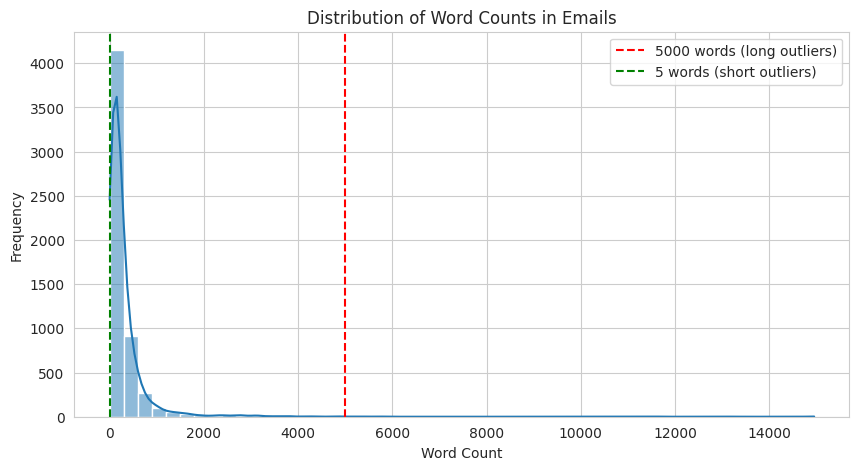

In [25]:
# Set plot style
sns.set_style("whitegrid")

# Plot histogram of word counts
plt.figure(figsize=(10, 5))
sns.histplot(df["word_count"], bins=50, kde=True)
plt.axvline(5000, color='r', linestyle='dashed', label="5000 words (long outliers)")
plt.axvline(5, color='g', linestyle='dashed', label="5 words (short outliers)")
plt.title("Distribution of Word Counts in Emails")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.legend()
plt.show()

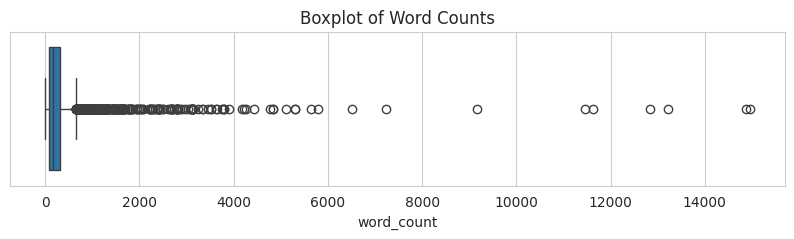

In [26]:
# Boxplot to visualize outliers
plt.figure(figsize=(10, 2))
sns.boxplot(x=df["word_count"])
plt.title("Boxplot of Word Counts")
plt.show()

(np.float64(-0.5), np.float64(2399.5), np.float64(2199.5), np.float64(-0.5))

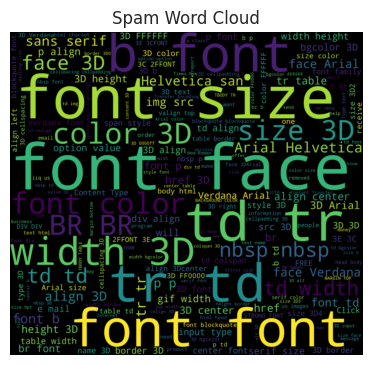

In [27]:
from wordcloud import WordCloud
# WordCloud for Spam and Ham messages
spam_words = " ".join(df[df['category'] == 1]['message'])
ham_words = " ".join(df[df['category'] == 0]['message'])

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Spam Word Cloud")
plt.imshow(WordCloud(width=2400, height=2200).generate(spam_words), interpolation='bilinear')
plt.axis("off")

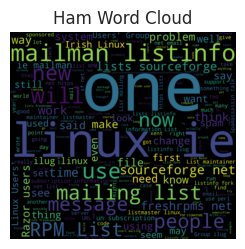

In [28]:
plt.subplot(1,2,2)
plt.title("Ham Word Cloud")
plt.imshow(WordCloud(width=2400, height=2200).generate(ham_words), interpolation='bilinear')
plt.axis("off")
plt.show()

## Preprocessing
To prepare the text for a neural network, we need to:
* Convert text into lowercase
* Remove punctuation & special characters
* Tokenize words (convert text into numbers)
* Pad sequences to the same length

In [29]:
#import libraries
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [30]:
# Text cleaning function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'_', ' ', text)  # Remove underscores
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

df['clean_message'] = df['message'].apply(clean_text)


In [31]:
df.head()

,category,message,message_length,word_count,clean_message
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",612,81,dear homeowner interest rates are at their low...
1,1,ATTENTION: This is a MUST for ALL Computer Use...,1298,161,attention this is a must for all computer user...
2,1,This is a multi-part message in MIME format.\n...,6691,509,this is a multi part message in mime format ne...
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,1141,154,important information the new domain names are...
4,1,This is the bottom line. If you can GIVE AWAY...,1795,309,this is the bottom line if you can give away c...


In [32]:
#view the tail
df

,category,message,message_length,word_count,clean_message
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",612,81,dear homeowner interest rates are at their low...
1,1,ATTENTION: This is a MUST for ALL Computer Use...,1298,161,attention this is a must for all computer user...
2,1,This is a multi-part message in MIME format.\n...,6691,509,this is a multi part message in mime format ne...
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,1141,154,important information the new domain names are...
4,1,This is the bottom line. If you can GIVE AWAY...,1795,309,this is the bottom line if you can give away c...
...,...,...,...,...,...
5791,0,"I'm one of the 30,000 but it's not working ver...",953,110,i m one of the 30 000 but it s not working ver...
5792,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,257,31,damien morton quoted w3c approves html 4 emoti...
5793,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...",393,47,on mon 2002 07 22 at 06 50 che wrote thats the...
5794,0,"Once upon a time, Manfred wrote :\n\n\n\n> I w...",1434,200,once upon a time manfred wrote i would like to...


### What is Tokenization?

Tokenization is the process of converting text into smaller units (tokens). In NLP, this means breaking sentences into words and mapping them to numerical values so that they can be processed by machine learning models.

### Why Do We Tokenize?
 * Computers can't understand text, only numbers.
 * Tokenization converts text into numeric form so that deep learning models can process it.
 * It helps in handling large vocabularies efficiently.

In [33]:
from collections import Counter

# Split all messages into words and count unique words
all_words = " ".join(df['clean_message']).split()
unique_words = Counter(all_words)

print(f"Total unique words: {len(unique_words)}")

Total unique words: 101174


In [34]:
# Tokenization
tokenizer = Tokenizer(num_words=20000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_message'])

##### Why Use the Top 5,000 Words?
When training an NLP model, we need to balance accuracy, memory efficiency, and model performance.

Here’s why we limit the vocabulary to 10,000 words:

1. Reducing Memory Usage
 * If we include every word in our dataset, the vocabulary size can be huge (tens or hundreds of thousands of words).
 * Larger vocabularies require more memory and longer training times.
 * Keeping only the most frequent 5,000 words reduces computational cost while still capturing most important words.

2. Handling Rare & Noisy Words
 * Many words in text data appear only a few times.
 * Rare words don’t contribute much to learning but increase model complexity.
 * Filtering out these words removes noise and makes training more stable.

**Example:**

Consider these messages:
 * "Free money!!! Click now!"
 * "Win a free vacation to Bahamas"
 *  "Your OTP is 123456"

A full vocabulary may include uncommon words like "Bahamas", "OTP", or "123456", which aren't very helpful. Instead, by keeping only common words, we ensure the model learns meaningful patterns.

3. Better Generalization
 * A smaller vocabulary prevents overfitting because the model learns general word patterns rather than memorizing specific words.
 * For words outside the 5,000-word limit, we use <OOV> (out-of-vocabulary token), which helps the model handle new, unseen words.

4. Trade-off Between Performance & Coverage

The number 10,000 is a good default because:
 * Most English text datasets are covered well with 5,000 words.
 * It provides a balance between model accuracy and training efficiency.
 * our dataset has over 100,000 unique values

 Why Not Use All 101,174 Words?
*  Memory issue: Storing embeddings for 100k+ words takes too much space.
*  Overfitting: The model may memorize rare words instead of learning general spam patterns.
* Longer training time: Processing 100k words slows down training.

#### What is a Sequence in NLP?
A sequence in NLP refers to a list of numbers where each number represents a word in a sentence. This numerical representation is crucial because machine learning models cannot process text directly—they work with numbers.

#### Why Use Sequences?
* Neural networks need numerical input
* Compact representation (instead of one-hot encoding)
* Can be used with Embedding layers for word learning


In [35]:
# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df['clean_message'])

#### What is Padding in NLP?
Padding is used to make all sequences the same length so they can be processed efficiently by deep learning models. Since different text messages have different lengths, we add extra zeros (or another padding value) to shorter sequences.

#### Why is Padding Needed?
Neural networks require inputs of the same size. However, text messages vary in length:
Without padding:The lengths are not equal → This won’t work in a neural network.
With padding (fixed to a certain length):all sequences have the same length

#### Important Padding Options
* maxlen → Sets the maximum sequence length. If a sequence is longer, it gets truncated (cut off).
* padding='pre' → Adds zeros before the sequence (default).
* padding='post' → Adds zeros after the sequence.
* truncating='pre' → Removes words from the beginning if a sentence is too long.
* truncating='post' → Removes words from the end if a sentence is too long.

**Summary**
* Padding ensures all sequences are the same length 📏
* Use pad_sequences() with maxlen, padding, and truncating options 🔧
* Choose an appropriate maxlen based on your dataset

In [36]:
# Pad sequences to ensure equal length
max_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

### Split

In [37]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['category'], test_size=0.2, random_state=42)

#### why didnt we split into x and y first
In this case, padded_sequences already represents the processed feature matrix
𝑋, and df['category'] represents the target variable 𝑦.

Normally, when working with structured datasets (like tabular data), we first split the dataset into features (𝑋) and target (𝑦) before performing any transformations. However, in NLP tasks like text classification, the text data undergoes tokenization and padding before splitting.

#### Why We Didn't Split Before Tokenization:
* Consistency in Tokenization & Padding
    * Tokenization converts text into sequences of integers based on a vocabulary generated from the entire dataset.
    * If we split before tokenization, the vocabulary might be different between training and test sets, leading to unseen tokens in the test set.
* Same Sequence Length for Training & Testing
    * Padding ensures that all sequences have the same length.
    * If we split before padding, the calculated max sequence length could vary, causing inconsistent input shapes.
**Process Flow:**
 * Tokenization → Convert text into integer sequences
 * Padding → Ensure uniform sequence length
 * Train-test split → Maintain the same vocabulary and input format

Since padded_sequences already represents numerical data ready for the model, we directly split it into

## Build a Simple Neural Network
Now that our text is converted into numbers, we can build a deep learning model using TensorFlow/Keras.

In [38]:
# Build a simple LSTM model
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=20000, output_dim=128, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True, activation='tanh')),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
#model.summary()

In [39]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 137s 917ms/step - accuracy: 0.6798 - loss: 0.6317 - val_accuracy: 0.6684 - val_loss: 0.6066
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 138s 925ms/step - accuracy: 0.7156 - loss: 0.5703 - val_accuracy: 0.7627 - val_loss: 0.4908
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 130s 924ms/step - accuracy: 0.8263 - loss: 0.4339 - val_accuracy: 0.8133 - val_loss: 0.4265
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 142s 924ms/step - accuracy: 0.8414 - loss: 0.3909 - val_accuracy: 0.9298 - val_loss: 0.2160
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 133s 862ms/step - accuracy: 0.9445 - loss: 0.1866 - val_accuracy: 0.9600 - val_loss: 0.1391
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 130s 923ms/step - accuracy: 0.9666 - loss: 0.1258 - val_accuracy: 0.9822 - val_loss: 0.0573
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 121s 861ms/step - accuracy: 0.9922 - loss: 0.0379 - val_accuracy: 0.9840 - val_loss: 0.0502
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 151s 925ms/step - accuracy: 0.9931 -

In [40]:
#check model =
y_pred = model.predict(X_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 326ms/step


In [41]:
y_pred = (y_pred>= 0.5)

In [42]:
#Evalauete the model on test dataset
model.evaluate(X_test, y_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 326ms/step - accuracy: 0.9926 - loss: 0.0312


[0.04933100566267967, 0.9893333315849304]

In [43]:
#checking the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9893333333333333

In [44]:
#check confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[740,   5],
       [  7, 373]])

In [ ]:
#check confusion metric score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

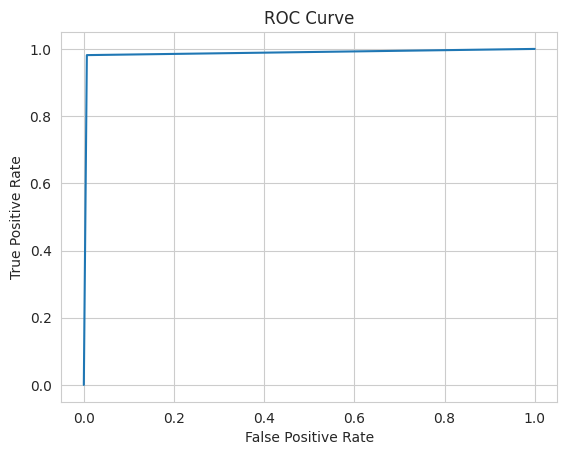

In [45]:
#plot roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

#plot
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()